In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\Gladys\Desktop\FIFA\Cleaned_data.csv")
df = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df

,id,name,age,ova,nationality,club,bov,bp,pot,height,...,goalkeeping,total_stats,base_stats,ir,pac,sho,pas,dri,def,phy
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,72,...,56,1929,408,2,71,59,70,71,68,69
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,71,70,...,56,1906,385,1,53,69,73,69,58,63
2,27,J. Cole,33,71,England,Coventry City,71,CAM,71,69,...,51,1770,354,2,45,68,76,77,36,52
3,36,D. Yorke,36,68,Trinidad and Tobago,Sunderland,70,ST,82,71,...,68,1348,369,1,61,66,66,69,47,60
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,67,...,45,2014,420,4,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,69,78,...,39,1367,302,1,54,30,37,48,64,69
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,66,70,...,57,1529,319,1,62,46,57,56,43,55
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,67,69,...,40,1430,303,1,63,35,44,52,54,55
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,73,69,...,51,1579,335,1,71,34,58,59,59,54


***

Correlation between wage and age

***

In [4]:
df2 = df[['name', 'age', 'wage']]
df2

,name,age,wage
0,G. Pasquale,33,7000
1,Luis García,37,7000
2,J. Cole,33,15000
3,D. Yorke,36,0
4,Iniesta,36,12000
...,...,...,...
17120,A. Medioub,22,2000
17121,W. Rickard,18,3000
17122,C. Barrett,18,2000
17123,J. Gazibegović,20,3000


In [5]:
df2.wage.unique()

array([  7000,  15000,      0,  12000,   5000,  44000,  60000,  40000,
        10000,  30000,  45000,   6000,  41000,   3000,  20000,   4000,
         2000,  35000,   8000,  25000, 160000,  80000,   9000,  70000,
       100000,  11000, 220000,  90000,    500,  19000,   1000,  50000,
        49000,  22000,  21000,  33000,    750, 110000,  23000,  16000,
          700,  13000,  17000,  31000,    600,    550,  27000,  14000,
       200000,  28000,  37000,  94000,  32000,  29000,  18000,    650,
        34000,  53000,  47000,  43000,  26000,  36000,  79000,  24000,
       300000,  66000,  62000,  54000,  65000, 560000,    900,  42000,
        57000,  93000,  48000,  51000, 350000,  81000, 125000,  58000,
        39000,  85000,  98000,  38000,  46000,  76000,  84000, 130000,
       115000,  83000, 170000,    800, 260000,  59000,  72000,    950,
        55000,  61000,  56000,  96000, 150000,  63000,  87000,    850,
       140000,  64000, 310000,  89000,  82000, 120000, 105000,  68000,
      

In [6]:
df2.age.unique()

array([33, 37, 36, 27, 38, 39, 35, 26, 42, 40, 34, 29, 41, 32, 31, 30, 47,
       24, 28, 23, 25, 22, 43, 19, 20, 21, 18, 17, 16, 53], dtype=int64)

In [8]:
numerical = df2.select_dtypes(exclude=['object'])
numerical

,age,wage
0,33,7000
1,37,7000
2,33,15000
3,36,0
4,36,12000
...,...,...
17120,22,2000
17121,18,3000
17122,18,2000
17123,20,3000


In [9]:
correl_matrix = numerical.corr()
correl_matrix

,age,wage
age,1.000000,0.200851
wage,0.200851,1.000000


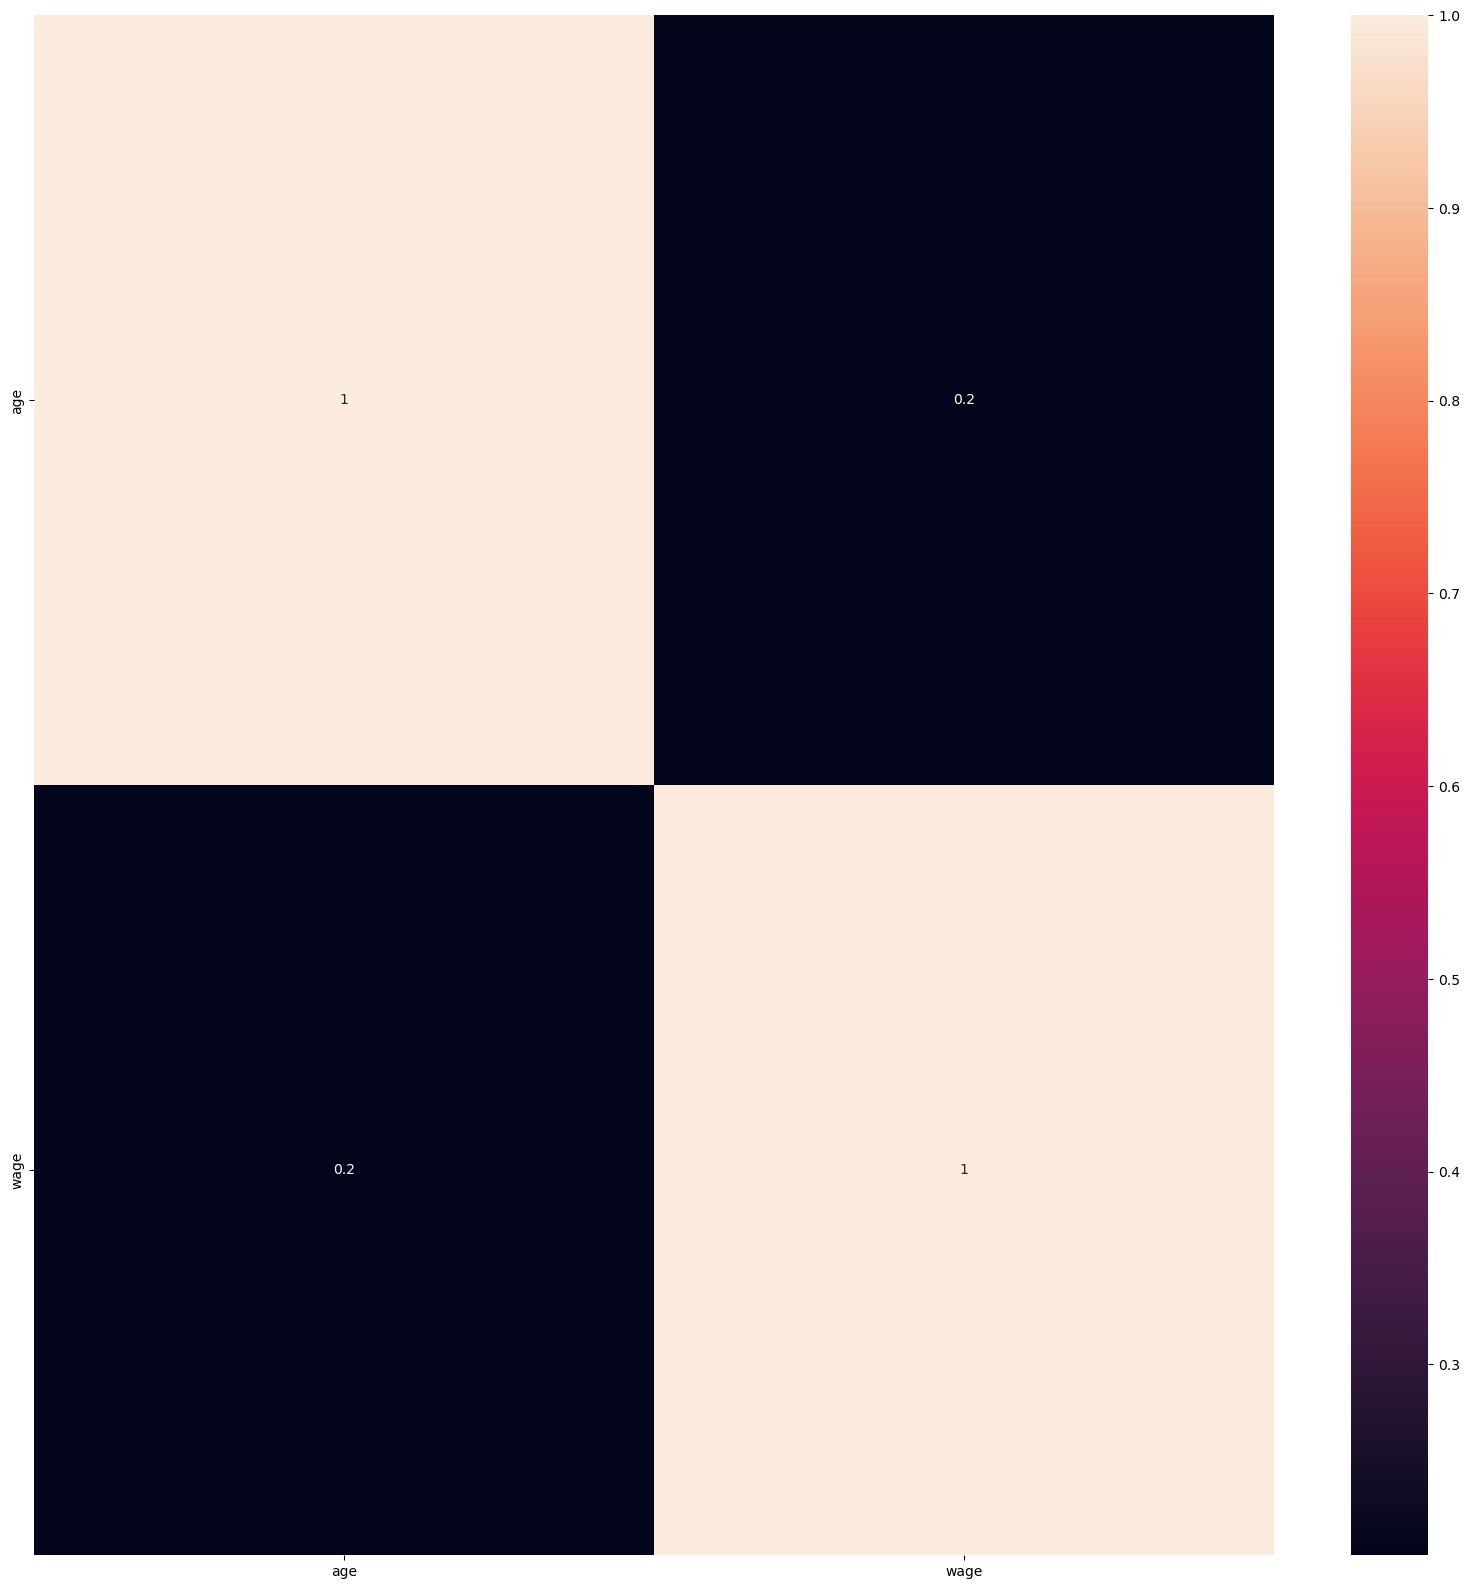

In [10]:
#very confused about this one
plt.figure(figsize=(20, 20))
sns.heatmap(correl_matrix, annot=True)
plt.show()

In [13]:
#We assign our columns to the variables x and y
X = df2['age']
y = df2['wage']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
#data transformation
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [16]:
#we train our model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

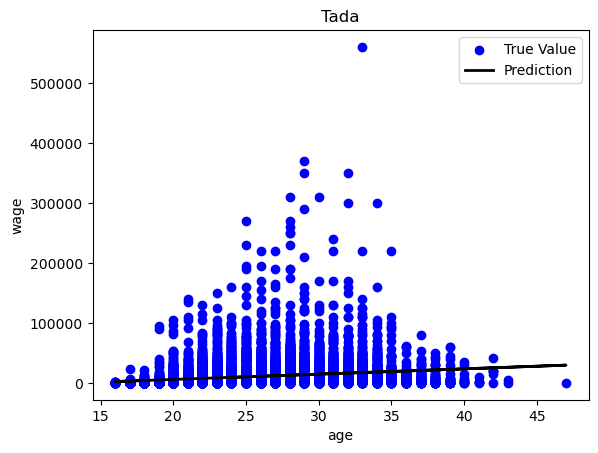

In [17]:
#this is to predict the wage
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("age")
plt.ylabel("wage")
plt.title('Tada')
plt.legend()
plt.show()

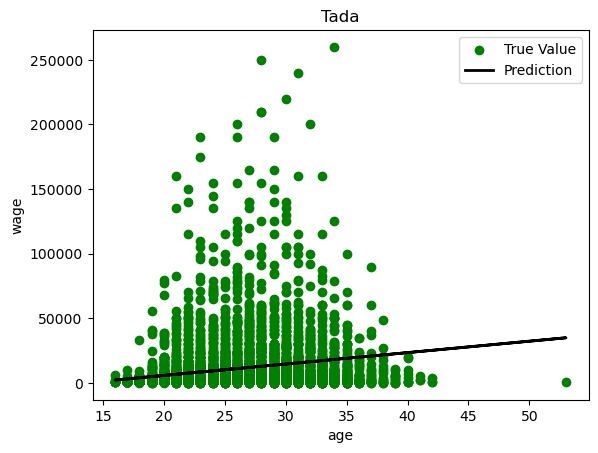

In [18]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("age")
plt.ylabel("wage")
plt.title('Tada')
plt.legend()
plt.show()

In [20]:
import sklearn.metrics as sm
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 413338964.69
Explain variance score = 0.04
R2 score = 0.04


#Not so good...